# WQD7005 - Data Mining


### Lab 3


##### Matrix Number : 17201091/1
    
##### Name : LIU,HONGYANG

# 0.Prequisite

Perform the following steps before trying the exercises:

a) Import pandas as "pd" and load the lab1 dataset into "df".


b) Print dataset information to refresh your memory.


c) Run preprocess_data function on the dataframe to perform preprocessing steps 
discussed last week.


d) Split your data into training and test with 70:30 distribution, stratified, random state 0.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv("lab1.csv");
df.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9686 entries, 0 to 9685
Data columns (total 28 columns):
TargetB             9686 non-null int64
ID                  9686 non-null int64
TargetD             4843 non-null float64
GiftCnt36           9686 non-null int64
GiftCntAll          9686 non-null int64
GiftCntCard36       9686 non-null int64
GiftCntCardAll      9686 non-null int64
GiftAvgLast         9686 non-null float64
GiftAvg36           9686 non-null float64
GiftAvgAll          9686 non-null float64
GiftAvgCard36       7906 non-null float64
GiftTimeLast        9686 non-null int64
GiftTimeFirst       9686 non-null int64
PromCnt12           9686 non-null int64
PromCnt36           9686 non-null int64
PromCntAll          9686 non-null int64
PromCntCard12       9686 non-null int64
PromCntCard36       9686 non-null int64
PromCntCardAll      9686 non-null int64
StatusCat96NK       9686 non-null object
StatusCatStarAll    9686 non-null int64
DemCluster          9686 non-null int64
De

In [3]:
# Preprocessing data
def preprocess_data(df):
    
    # Setting correct type to variables
    df['DemCluster'] = df['DemCluster'].astype(str)

    #DemHomeOwner should be a binary variable

    df['DemHomeOwner'] = df['DemHomeOwner'].replace({'H':1,'U':0})


    #denote errorneous values in DemMidIncome

    mask = df['DemMedIncome'] < 1
    df.loc[mask, 'DemMedIncome'] = np.nan
    
    #use the median value to relpace 0 vlaue
    df['DemMedIncome'] = df['DemMedIncome'].replace({0:df['DemMedIncome'].median()})
    df['DemAge'] = df['DemAge'].fillna({0:df['DemAge'].median()})

        
    df['DemAge'].fillna(df['DemAge'].median(), inplace=True)
    df['DemMedIncome'].fillna(df['DemMedIncome'].median(), inplace = True)
    df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].median(), inplace = True)
    
    
    #delete columns
    df = df.drop(['ID'], axis=1)
    df = df.drop(['TargetD'], axis=1)
    
    #Formatting Categorical Variable
    
    df = pd.get_dummies(df)
    
    return df


In [4]:
# preprocess data
df = preprocess_data(df)

In [5]:
df.head()

,TargetB,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,GiftAvgCard36,GiftTimeLast,...,DemCluster_51,DemCluster_52,DemCluster_53,DemCluster_6,DemCluster_7,DemCluster_8,DemCluster_9,DemGender_F,DemGender_M,DemGender_U
0,0,2,4,1,3,17.0,13.50,9.25,17.00,21,...,0,0,0,0,0,0,0,1,0,0
1,0,1,8,0,3,20.0,20.00,15.88,12.50,26,...,0,0,0,0,0,0,0,1,0,0
2,1,6,41,3,20,6.0,5.17,3.73,5.00,18,...,0,0,0,0,0,0,0,0,1,0
3,1,3,12,3,8,10.0,8.67,8.50,8.67,9,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,1,1,20.0,20.00,20.00,20.00,21,...,0,0,0,0,0,0,0,0,1,0


In [6]:
# import libraries
from sklearn.model_selection import train_test_split

#load data

#Traing dataset
X=df.drop(['TargetB'],axis=1)

#Target dataset
Y=df['TargetB']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y,random_state=0)

# 1.Standardisation and Logistic Regression

**Perform following operations and answer the following questions:**

a) What is the difference between logistic regression and linear regression?  

- In case of Linear Regression the outcome is continuous while in case of Logistic Regression outcome is discrete (not continuous).

- Linear Regression is a regression algorithm for Machine Learning while Logistic Regression is a classification Algorithm for machine learning.

___

b) Describe how logistic regression perform its prediction. 

- logistic regression could transform the input data into binary class.

___
c) Write code to perform standardisation on your training and test dataset. 

see code 

___

d) What does standardisation do to your data? How does it benefit your regression model? 


Scaling and standardizing can help features arrive in more digestible form for algorithms. It could help scaling input features so they have mean of 0 and standard deviation of 1. 

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

In addition, standardised input features allow us to compare their regression weights and figure out the important variables.

---


e) Write code to fit a logistic regression model to your training data. How does it perform on the training and test data? Do you see any indication of overfitting?  

**explanation:**

Overfitting means the model fit well in the training datasets, but badly in test datasets

So we only need to compare the performance of the model on training and testing datasets.

If there is no big difference.

The model is not overfitting, vice versa.

Consequently, the not much indication of overfitting.

see code 



---

f) Write code to find the most important features in your model.

see code

---

In [8]:
# import logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

logisticRegression = LogisticRegression()

 # fit 
logisticRegression.fit(X_train, y_train)


y_pred = logisticRegression.predict(X_test)

#performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1453
           1       0.59      0.57      0.58      1453

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906



##### standardisation

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

 # fit 
logisticRegression.fit(X_train, y_train)


y_pred = logisticRegression.predict(X_test)


#performance
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1453
           1       0.58      0.57      0.57      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906



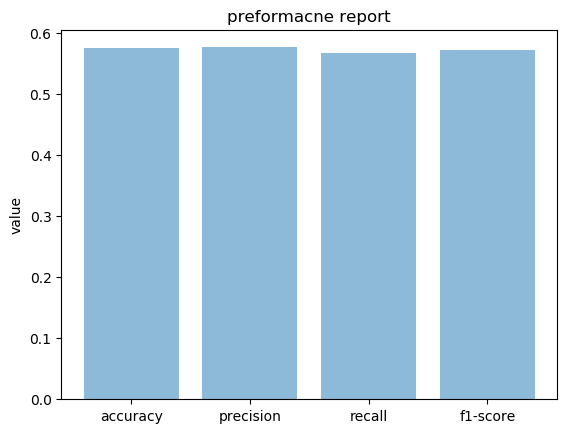

In [16]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score=metrics.f1_score(y_test,y_pred)



objects = ("accuracy","precision","recall","f1-score")
y_pos = np.arange(len(objects))
performance3 = [accuracy,precision,recall,f1_score]

plt.bar(y_pos, performance3, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('value')
plt.title('preformacne report')

plt.show()

##### Overfitting or not

In [18]:
# test the best model
print("Train accuracy:", logisticRegression.score(X_train, y_train))
print("Test accuracy:", logisticRegression.score(X_test, y_test))

Train accuracy: 0.5834808259587021
Test accuracy: 0.5746730901582932


Overfitting means the model fit well in the training datasets, but badly in test datasets

So we only need to compare the performance of the model on training and testing datasets.

If there is no big difference.

The model is not overfitting, vice versa.

Consequently, the not much indication of overfitting.

#####  most important features

In [21]:
from sklearn.model_selection import GridSearchCV 


# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=0), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)


Train accuracy: 0.5821533923303834
Test accuracy: 0.5832759807295251
              precision    recall  f1-score   support

           0       0.58      0.60      0.59      1453
           1       0.59      0.57      0.58      1453

    accuracy                           0.58      2906
   macro avg       0.58      0.58      0.58      2906
weighted avg       0.58      0.58      0.58      2906

{'C': 0.001}


In [22]:
# most important features
import numpy as np

coef = cv.best_estimator_.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

GiftTimeLast : -0.10398379814905222
GiftCntCard36 : 0.06485233398730723
GiftCnt36 : 0.05853084359831786
DemMedHomeValue : 0.0571625581037534
PromCntCard36 : 0.045115630837314555
StatusCat96NK_E : 0.04291701799947188
StatusCatStarAll : 0.03805473352502127
DemCluster_44 : -0.03721419598180589
DemCluster_0 : 0.035040210449018644
DemCluster_10 : -0.03499692670703686
DemCluster_30 : -0.03223317076474372
DemCluster_32 : -0.03089576072366439
GiftTimeFirst : 0.030807974556374036
DemCluster_40 : 0.02937932607268234
DemCluster_16 : -0.028627838133722834
DemCluster_23 : 0.027806110502039832
GiftAvgLast : -0.02643596312760835
DemCluster_3 : 0.025325284704550585
DemCluster_47 : -0.024768103728447715
DemCluster_15 : -0.022409649202684706


Consequently, GiftTimeLast, GiftCntCard36 and GiftCnt36 are the most important features